This notebook is about __Random Forest__ performance in __full phase__

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
import os

from common import OUTPUTPATH
from models import random_forest_pcc
import data

In [7]:
# estimators here
STATE = np.random.RandomState(seed=1000)
random_forest_pcc.fit(data.x1, data.y)

In [8]:
fitted_models = random_forest_pcc.fitted_
all_columns = data.predictors + data.targets
data1 = pd.concat([data.x1, data.y], axis=1)
data1


,clogp_corona,mon_corona_mw,mon_corona_apol,mon_corona_mv,mon_corona_psa,dp_corona,corona_mw_total,corona_mv_total,clogp_core,mon_core_mw,...,ratio_vol,conc,ph,salt,charged,temp,sphere,worm,vesicle,other
0,0.09,160.07,23.529516,1.2437,66.76,56,8963.92,69.6472,1.10445,144.8997,...,0.244374,10.0,7.0,0.0,0,70,0,1,0,0
1,0.09,160.07,23.529516,1.2437,66.76,56,8963.92,69.6472,1.10445,144.8997,...,0.326043,10.0,7.0,0.0,0,70,1,0,0,0
2,0.09,160.07,23.529516,1.2437,66.76,56,8963.92,69.6472,1.10445,144.8997,...,0.266637,10.0,7.0,0.0,0,70,1,1,0,0
3,0.09,160.07,23.529516,1.2437,66.76,56,8963.92,69.6472,1.10445,144.8997,...,0.225543,10.0,7.0,0.0,0,70,0,1,0,0
4,0.09,160.07,23.529516,1.2437,66.76,56,8963.92,69.6472,1.10445,144.8997,...,0.183192,10.0,7.0,0.0,0,70,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,0.09,160.07,23.529516,1.2437,66.76,54,8643.78,67.1598,1.10000,144.0800,...,0.239463,10.0,7.0,0.0,0,70,0,1,1,0
588,0.09,160.07,23.529516,1.2437,66.76,54,8643.78,67.1598,1.10000,144.0800,...,0.204843,10.0,7.0,0.0,0,70,0,0,1,0
589,0.09,160.07,23.529516,1.2437,66.76,37,5922.59,46.0169,1.10000,144.0800,...,0.326785,10.0,7.0,0.0,0,70,0,1,0,0
590,0.09,160.07,23.529516,1.2437,66.76,54,8643.78,67.1598,1.10000,144.0800,...,0.288166,20.0,7.0,0.0,0,70,0,1,0,0


Text(0.5, 1.0, 'Sphere Feature Importance')

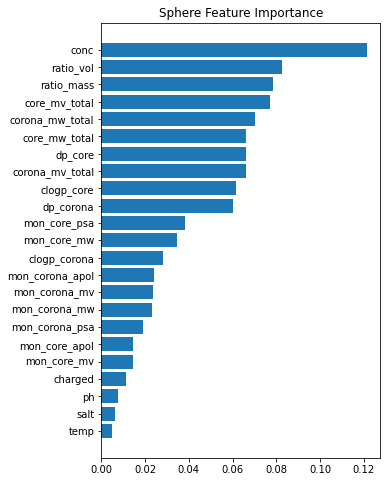

In [9]:
sorted_idx = fitted_models[0].feature_importances_.argsort()
plt.figure(figsize=(5,8))
plt.barh(data1.columns[:-4][sorted_idx], fitted_models[0].feature_importances_[sorted_idx])
plt.title("Sphere Feature Importance")

In [10]:
num_importance = 5 # change here to show top more plots

_, axs = plt.subplots(ncols=num_importance, nrows=3, figsize=(20, 12), sharey=True)
common_params = {
    "n_jobs": 12,
}
for j in range(3):
    col_indx = -4 + j

    sorted_idx = fitted_models[j].feature_importances_.argsort()
    order = list(data1.iloc[:, :col_indx].columns[sorted_idx])[::-1]
    importance_scores = fitted_models[j].feature_importances_[sorted_idx][::-1]

    plot_partial_dependence(fitted_models[j], 
                            features=order[:num_importance], 
                            X=data1.iloc[:, :col_indx],
                            ax=axs[j, :],
                            **common_params)
    for i in range(5):
        text = order[i] + ': ' + str(round(importance_scores[i], 4))
        axs[j, i].set_ylim([0.1, 0.7])
        axs[j, i].text(0.5, 0.55, text, horizontalalignment='center', verticalalignment='center', transform=axs[j, i].transAxes)
        axs[j, i].set_xlabel(None)
        axs[j, i].set_ylabel(None)


axs[0,0].set_ylabel('Sphere')
axs[1,0].set_ylabel('Worm')
axs[2,0].set_ylabel('Vesicle')
plt.suptitle('Random Forest Top {} partial dependency with importance score'.format(num_importance))
plt.savefig(os.path.join(OUTPUTPATH, 'Random_Forest_Top_5_partial_dependency.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
